In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)


In [3]:
import pandas as pd

Y=pd.get_dummies(digits.target).values
X=data

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
Y

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [8]:

#모델 생성

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='softmax')) #imput_shape->입력층
model.add(Dense(25,activation='softmax'))
model.add(Dense(20,activation='softmax'))
model.add(Dense(15,activation='softmax'))
model.add(Dense(10,activation='softmax')) #다층 퍼셉트론 -> softmax / 퍼셉트론 -> sigmoid, 출력층은 class갯수가 되도록

model.compile(Adam(learning_rate=0.03),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\tpfzl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,720 (14.53 KB)

 Trainable params: 3,720 (14.53 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=40, batch_size=50,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0898 - loss: 2.3107 - val_accuracy: 0.1083 - val_loss: 2.3102
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1209 - loss: 2.2965 - val_accuracy: 0.2111 - val_loss: 2.1699
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1833 - loss: 2.0936 - val_accuracy: 0.0778 - val_loss: 2.4980
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1229 - loss: 2.4103 - val_accuracy: 0.1028 - val_loss: 2.2244
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1524 - loss: 2.1684 - val_accuracy: 0.1111 - val_loss: 2.1700
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1695 - loss: 2.1054 - val_accuracy: 0.1528 - val_loss: 2.1303
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2109 - loss: 2.0897 - val_accuracy: 0.1083 - val_loss: 2.2252
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1871 - loss: 2.1026 - val_accuracy: 0.1667 - val_loss:

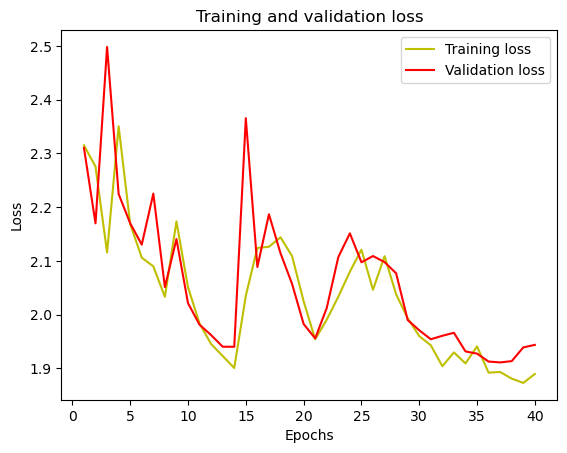

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

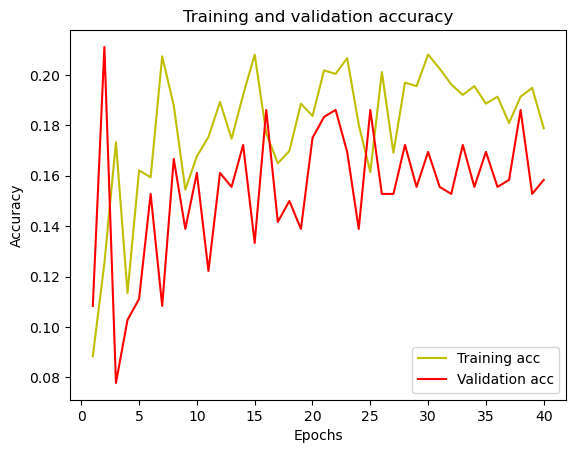

In [11]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        36
           3       0.13      0.97      0.23        29
           4       0.21      0.97      0.34        30
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00        41

    accuracy                           0.16       360
   macro avg       0.03      0.19      0.06       360
weighted avg       0.03      0.16      0.05       360

[[ 0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0 33  2  0  0  0  0  0]
 [ 0  0  0 35  1  0  0  0  0  0]
 [ 0  0  0 28  1  0  0  0  0  0]
 [ 0  0  0  1 29  0  0  0  0  0]
 [ 0  0  0 36  4  0  0  0  0  0]
 [ 0  0  0  6 38  0  0  0  0  0]
 [ 0  0  0

C:\Users\tpfzl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tpfzl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tpfzl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
